In [176]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)  

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.read_csv('telco_final.csv')

df

,Unnamed: 0,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason,Population,Unemployment Rate
0,0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,Competitor,Competitor offered more data,64147.0,5.4%
1,1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,Competitor,Competitor made better offer,52008.0,6.9%
2,2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,Competitor,Competitor made better offer,44897.0,7.3%
3,3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,Dissatisfaction,Limited range of services,23370.0,8.0%
4,4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,Price,Extra data charges,25949.0,5.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Q3,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,0,NaN,NaN,2726.0,13.6%
7039,7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,0,NaN,NaN,38565.0,8.7%
7040,7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Q3,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,0,NaN,NaN,0.0,NaN
7041,7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Q3,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,0,NaN,NaN,500.0,NaN


### Dropping columns which are not relevant for the use case

In [178]:
pd.set_option('display.max_columns', None)

Dropping Lat Long, Quarter, Country, State as they are redundant

In [179]:
columns_to_drop = ['Lat Long','Quarter','Unnamed: 0','Country','State','Customer ID']
df = df.drop(labels=columns_to_drop, axis = 1)

Also, I think Zip code gives more than the information that a city gives. Also, Lat and Long values give the same information as zipcode. So it makes sense to just use zip code and drop city, lat, long.

In [180]:
columns_to_drop = ['City','Latitude','Longitude']
df = df.drop(labels=columns_to_drop, axis = 1)

In [181]:
df.sort_values(by = ['Zip Code'], ascending = False)

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason,Population,Unemployment Rate
1789,Male,53,No,No,No,No,0,96150,No,0,31,None,Yes,9.27,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,103.45,3066.45,0.0,0,287.37,3353.82,3,Churned,Yes,1,Dissatisfaction,Poor expertise of phone support,NaN,NaN
2115,Male,47,No,No,No,No,0,96150,No,0,1,Offer E,Yes,1.13,No,Yes,Fiber Optic,6,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,90.85,90.85,0.0,0,1.13,91.98,3,Churned,Yes,1,Price,Price too high,NaN,NaN
3589,Female,29,Yes,No,No,No,0,96148,No,0,27,None,Yes,1.31,No,Yes,Cable,53,No,Yes,No,Yes,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,56.15,1439.35,0.0,0,35.37,1474.72,3,Stayed,No,0,NaN,NaN,630.0,NaN
5726,Female,30,No,No,No,No,0,96148,No,0,29,None,Yes,15.06,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,19.40,554.25,0.0,0,436.74,990.99,3,Stayed,No,0,NaN,NaN,630.0,NaN
440,Male,69,No,Yes,No,No,0,96148,No,0,66,None,Yes,9.90,Yes,Yes,Fiber Optic,25,No,Yes,Yes,Yes,Yes,Yes,No,Yes,One Year,No,Credit Card,110.90,7432.05,0.0,0,653.40,8085.45,3,Churned,Yes,1,Attitude,Attitude of service provider,630.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,Male,56,No,No,No,No,0,90002,No,0,13,None,Yes,46.92,No,No,None,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,20.40,251.65,0.0,0,609.96,861.61,5,Stayed,No,0,NaN,NaN,53108.0,10.5%
3590,Male,36,No,No,Yes,No,0,90001,Yes,1,17,None,No,0.00,No,Yes,Cable,10,Yes,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Mailed Check,34.40,592.75,0.0,0,0.00,592.75,3,Stayed,No,0,NaN,NaN,57652.0,9.4%
2535,Female,36,No,No,Yes,No,0,90001,No,0,1,Offer E,No,0.00,No,Yes,DSL,10,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.85,29.85,0.0,0,0.00,29.85,3,Joined,No,0,NaN,NaN,57652.0,9.4%
323,Female,66,No,Yes,No,No,0,90001,No,0,8,Offer E,Yes,5.21,No,Yes,Fiber Optic,8,No,No,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Credit Card,94.45,742.95,0.0,0,41.68,784.63,1,Churned,Yes,1,Competitor,Competitor had better devices,57652.0,9.4%


In [182]:
df

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason,Population,Unemployment Rate
0,Male,78,No,Yes,No,No,0,90022,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,Competitor,Competitor offered more data,64147.0,5.4%
1,Female,74,No,Yes,Yes,Yes,1,90063,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,Competitor,Competitor made better offer,52008.0,6.9%
2,Male,71,No,Yes,No,Yes,3,90065,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,Competitor,Competitor made better offer,44897.0,7.3%
3,Female,78,No,Yes,Yes,Yes,1,90303,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,Dissatisfaction,Limited range of services,23370.0,8.0%
4,Female,80,No,Yes,Yes,Yes,1,90602,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,Price,Extra data charges,25949.0,5.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,No,No,0,92285,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,0,NaN,NaN,2726.0,13.6%
7039,Male,38,No,No,Yes,Yes,2,92301,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,0,NaN,NaN,38565.0,8.7%
7040,Female,30,No,No,Yes,Yes,2,92304,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,0,NaN,NaN,0.0,NaN
7041,Female,32,No,No,Yes,Yes,2,92305,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,0,NaN,NaN,500.0,NaN


In [183]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [184]:
df.columns

Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Zip Code', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Category', 'Churn Reason', 'Population',
       'Unemployment Rate'],
      dtype='object')

'Paperless billing' is another column that is not relevant as it does not effect the churn of a customer. As we have created 'Total Charges' column by combining 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', we are dropping all those columns.

In [185]:
df = df[['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Zip Code', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Payment Method', 'Monthly Charge',
       'Total Revenue','Population',
       'Unemployment Rate','Churn Value']]

In [186]:
df['Unemployment Rate'] = df['Unemployment Rate'].str.strip('%').astype(float)

C:\Users\bhuvv\AppData\Local\Temp\ipykernel_38452\1794529411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unemployment Rate'] = df['Unemployment Rate'].str.strip('%').astype(float)


In [187]:
df

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Revenue,Population,Unemployment Rate,Churn Value
0,Male,78,No,Yes,No,No,0,90022,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Bank Withdrawal,39.65,59.65,64147.0,5.4,1
1,Female,74,No,Yes,Yes,Yes,1,90063,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Credit Card,80.65,1024.10,52008.0,6.9,1
2,Male,71,No,Yes,No,Yes,3,90065,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Bank Withdrawal,95.45,1910.88,44897.0,7.3,1
3,Female,78,No,Yes,Yes,Yes,1,90303,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Bank Withdrawal,98.50,2995.07,23370.0,8.0,1
4,Female,80,No,Yes,Yes,Yes,1,90602,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,76.50,3102.36,25949.0,5.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,No,No,0,92285,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Bank Withdrawal,21.15,3039.53,2726.0,13.6,0
7039,Male,38,No,No,Yes,Yes,2,92301,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Mailed Check,84.80,2807.47,38565.0,8.7,0
7040,Female,30,No,No,Yes,Yes,2,92304,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Credit Card,103.20,9453.04,0.0,NaN,0
7041,Female,32,No,No,Yes,Yes,2,92305,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,29.60,319.21,500.0,NaN,0


### Outlier handling

In [188]:
numerical_columns = ['Age','Zip Code','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Revenue','Population','Unemployment Rate']

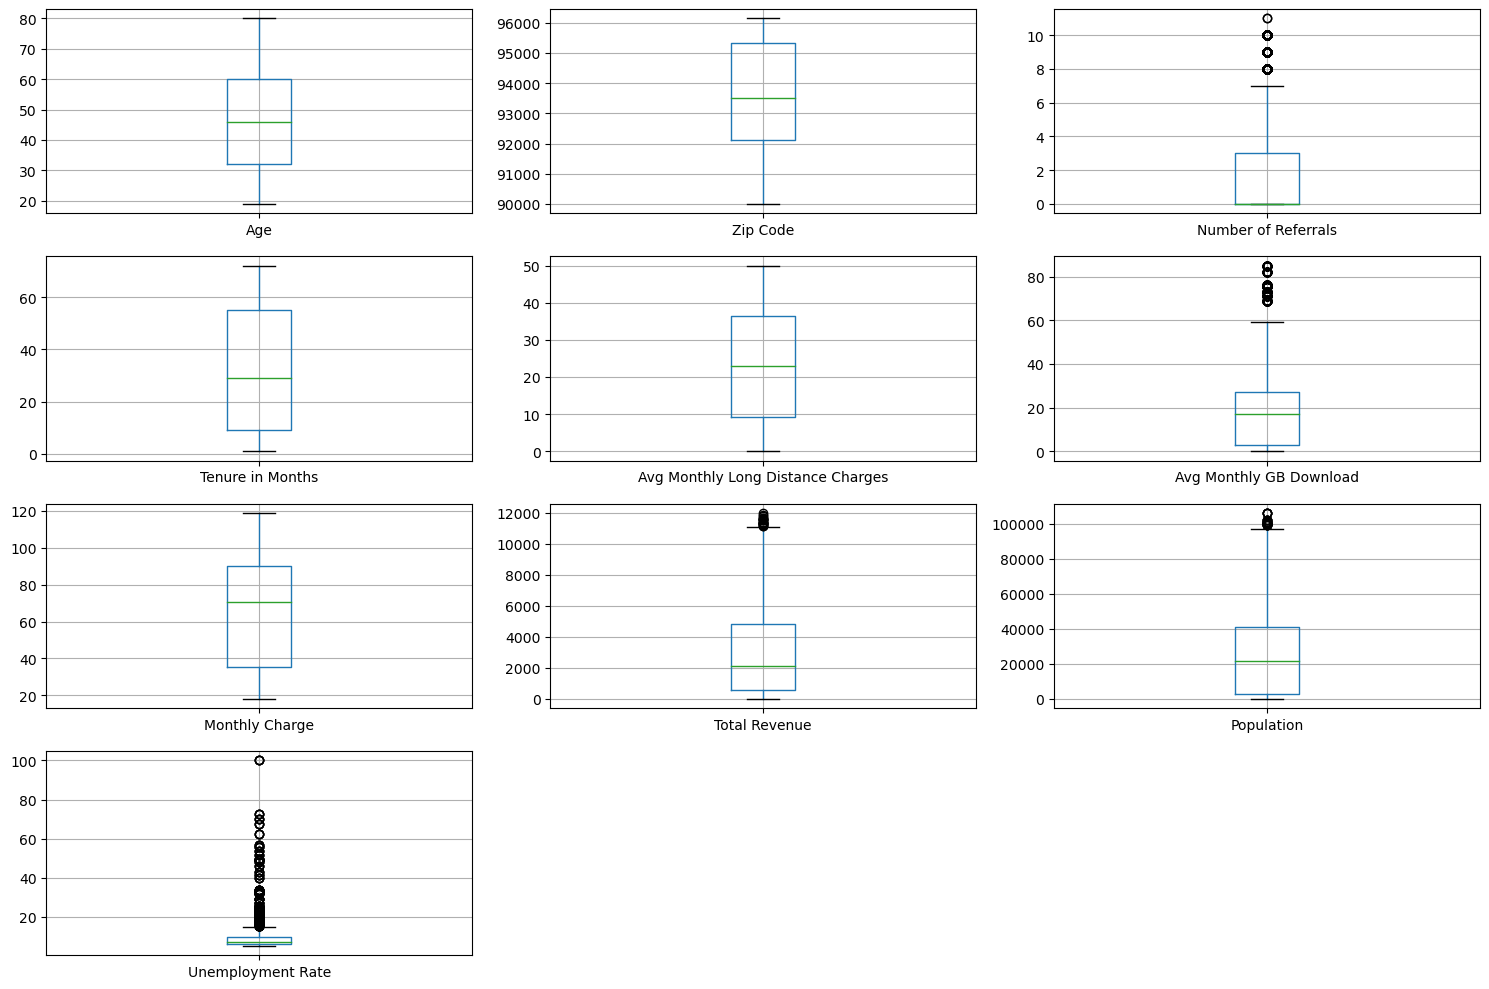

In [189]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    df.boxplot(column=col)

plt.tight_layout()
plt.show()

Dropping unemployment rate as there are lot of null values

In [190]:
df['Unemployment Rate'].isna().sum()

2999

In [191]:
df.drop(labels='Unemployment Rate',axis=1,inplace=True)

C:\Users\bhuvv\AppData\Local\Temp\ipykernel_38452\2342237589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels='Unemployment Rate',axis=1,inplace=True)


Outlier handling using IQR

In [192]:
numerical_columns = ['Age','Zip Code','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Revenue','Population']
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [193]:
df

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Revenue,Population,Churn Value
0,Male,78,No,Yes,No,No,0,90022,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Bank Withdrawal,39.65,59.65,64147.0,1
1,Female,74,No,Yes,Yes,Yes,1,90063,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Credit Card,80.65,1024.10,52008.0,1
2,Male,71,No,Yes,No,Yes,3,90065,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Bank Withdrawal,95.45,1910.88,44897.0,1
3,Female,78,No,Yes,Yes,Yes,1,90303,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Bank Withdrawal,98.50,2995.07,23370.0,1
4,Female,80,No,Yes,Yes,Yes,1,90602,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,76.50,3102.36,25949.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,No,No,0,92285,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Bank Withdrawal,21.15,3039.53,2726.0,0
7039,Male,38,No,No,Yes,Yes,2,92301,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Mailed Check,84.80,2807.47,38565.0,0
7040,Female,30,No,No,Yes,Yes,2,92304,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Credit Card,103.20,9453.04,0.0,0
7041,Female,32,No,No,Yes,Yes,2,92305,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,29.60,319.21,500.0,0


In [194]:
df['Churn Value'].value_counts()

0    4212
1    1768
Name: Churn Value, dtype: int64

## Classification Model - 1

In [195]:
#Separate  X and Y
y = df['Churn Value']
X = df.drop("Churn Value", axis = 1)

### Encoding categorical columns

In [196]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

X['Gender'] = Le.fit_transform(X['Gender'])
X['Under 30'] = Le.fit_transform(X['Under 30'])
X['Senior Citizen'] = Le.fit_transform(X['Senior Citizen'])
X['Married'] = Le.fit_transform(X['Married'])
X['Dependents'] = Le.fit_transform(X['Dependents'])
X['Referred a Friend'] = Le.fit_transform(X['Referred a Friend'])
X['Offer'] = Le.fit_transform(X['Offer'])
X['Phone Service'] = Le.fit_transform(X['Phone Service'])
X['Multiple Lines'] = Le.fit_transform(X['Multiple Lines'])
X['Internet Service'] = Le.fit_transform(X['Internet Service'])
X['Internet Type'] = Le.fit_transform(X['Internet Type'])
X['Online Security'] = Le.fit_transform(X['Online Security'])
X['Online Backup'] = Le.fit_transform(X['Online Backup'])
X['Device Protection Plan'] = Le.fit_transform(X['Device Protection Plan'])
X['Premium Tech Support'] = Le.fit_transform(X['Premium Tech Support'])
X['Streaming TV'] = Le.fit_transform(X['Streaming TV'])
X['Streaming Movies'] = Le.fit_transform(X['Streaming Movies'])
X['Streaming Music'] = Le.fit_transform(X['Streaming Music'])
X['Contract'] = Le.fit_transform(X['Contract'])
X['Unlimited Data'] = Le.fit_transform(X['Unlimited Data'])
X['Payment Method'] = Le.fit_transform(X['Payment Method'])

In [197]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

cols = X.columns
# Standardize (normalize) the numeric columns
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

In [198]:
X

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Revenue,Population
0,0.990016,1.848163,-0.442989,2.187091,-0.858110,-0.504177,-0.448217,-1.879263,-0.808555,-0.593629,-1.224182,-0.766584,-3.054202,-1.477450,-0.837136,0.537653,-0.818239,-0.584207,-0.597180,-0.694814,1.440879,-0.609041,-0.759882,1.293069,-0.706220,-1.412265,-0.838451,-0.827244,-0.806021,-1.009106,1.738489
1,-1.010084,1.604619,-0.442989,2.187091,1.165352,1.983430,0.664417,-1.857086,1.236774,-0.094206,-0.933708,1.906090,0.327418,1.699400,1.194549,0.537653,0.257397,-0.028920,-0.597180,1.439233,-0.694021,-0.609041,-0.759882,-0.773354,-0.706220,0.708083,-0.838451,0.825585,0.563059,-0.654866,1.203256
2,0.990016,1.421961,-0.442989,2.187091,-0.858110,1.983430,2.889685,-1.856004,-0.808555,-0.593629,-0.518745,1.371555,0.327418,-0.740629,1.194549,0.537653,0.257397,2.130528,-0.597180,-0.694814,-0.694021,-0.609041,1.315994,1.293069,1.415989,0.708083,-0.838451,-0.827244,1.057263,-0.329154,0.889718
3,-1.010084,1.848163,-0.442989,2.187091,1.165352,1.983430,0.664417,-1.727267,1.236774,-0.094206,-0.228271,0.837021,0.327418,-0.192403,-0.837136,0.537653,0.257397,-0.337413,-0.597180,1.439233,1.440879,-0.609041,1.315994,1.293069,-0.706220,0.708083,-0.838451,-0.827244,1.159110,0.069066,-0.059452
4,-1.010084,1.969935,-0.442989,2.187091,1.165352,1.983430,0.664417,-1.565535,1.236774,-0.094206,0.269684,0.837021,0.327418,-1.065793,1.194549,0.537653,0.257397,-0.214015,-0.597180,-0.694814,-0.694021,-0.609041,-0.759882,-0.773354,-0.706220,0.708083,-0.838451,-0.827244,0.424481,0.108474,0.054262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-1.010084,-1.074362,-0.442989,-0.457228,-0.858110,-0.504177,-0.448217,-0.655182,-0.808555,-0.593629,1.722054,-0.766584,0.327418,0.003346,-0.837136,-1.859935,1.333034,-1.077795,-0.597180,-0.694814,-0.694021,-0.609041,-0.759882,-0.773354,-0.706220,-1.412265,1.560562,-0.827244,-1.423776,0.085397,-0.969688
7039,0.990016,-0.587274,-0.442989,-0.457228,1.165352,1.983430,1.777051,-0.646527,1.236774,-0.094206,-0.269767,0.837021,0.327418,0.866981,1.194549,0.537653,-1.893876,0.402970,1.674536,-0.694814,1.440879,1.641926,1.315994,1.293069,1.415989,0.708083,0.361056,2.478414,0.701637,0.000161,0.610527
7040,-1.010084,-1.074362,-0.442989,-0.457228,1.165352,1.983430,1.777051,-0.644904,1.236774,1.404066,1.722054,-0.766584,0.327418,0.451422,1.194549,0.537653,0.257397,2.562418,-0.597180,1.439233,1.440879,-0.609041,1.315994,1.293069,1.415989,0.708083,0.361056,0.825585,1.316053,2.441063,-1.089883
7041,-1.010084,-0.952590,-0.442989,-0.457228,1.165352,1.983430,1.777051,-0.644363,1.236774,-0.094206,-0.809219,-0.766584,-3.054202,-1.477450,-0.837136,0.537653,-0.818239,-0.028920,1.674536,-0.694814,-0.694021,-0.609041,-0.759882,-0.773354,-0.706220,0.708083,-0.838451,-0.827244,-1.141612,-0.913770,-1.067837


### Splitting into train and test

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [200]:
y_train.value_counts()

0    3379
1    1405
Name: Churn Value, dtype: int64

In [201]:
y_test.value_counts()

0    833
1    363
Name: Churn Value, dtype: int64

In [202]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(X_train, y_train)

[Text(0.5769230769230769, 0.875, 'x[26] <= -0.239\nentropy = 0.873\nsamples = 4784\nvalue = [3379, 1405]'),
 Text(0.3076923076923077, 0.625, 'x[1] <= 1.026\nentropy = 0.999\nsamples = 2615\nvalue = [1356, 1259]'),
 Text(0.15384615384615385, 0.375, 'x[28] <= 0.13\nentropy = 0.979\nsamples = 2194\nvalue = [1285.0, 909.0]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.845\nsamples = 1062\nvalue = [773, 289]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.993\nsamples = 1132\nvalue = [512, 620]'),
 Text(0.46153846153846156, 0.375, 'x[10] <= 0.083\nentropy = 0.655\nsamples = 421\nvalue = [71, 350]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.486\nsamples = 313\nvalue = [33, 280]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.936\nsamples = 108\nvalue = [38, 70]'),
 Text(0.8461538461538461, 0.625, 'x[5] <= 0.74\nentropy = 0.356\nsamples = 2169\nvalue = [2023, 146]'),
 Text(0.7692307692307693, 0.375, 'x[28] <= 0.998\nentropy = 0.443\nsamples = 1590\nvalue = [1444, 146]'),
 Text(0.

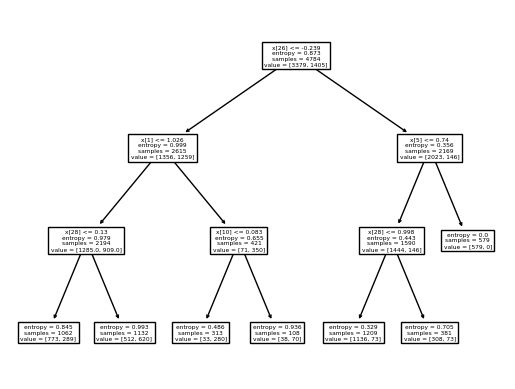

In [203]:
tree.plot_tree(clf)

In [204]:
# Get feature importances
importances = clf.feature_importances_

importances_df = pd.DataFrame(importances, index=X_train.keys(), columns=["Importance"])
print("Sorted version\n")
importances_df = importances_df.sort_values(by="Importance", ascending=False)
print(importances_df)

Sorted version

                                   Importance
Contract                             0.641805
Age                                  0.153131
Monthly Charge                       0.131902
Dependents                           0.055050
Tenure in Months                     0.018112
Gender                               0.000000
Online Backup                        0.000000
Device Protection Plan               0.000000
Premium Tech Support                 0.000000
Streaming TV                         0.000000
Streaming Music                      0.000000
Streaming Movies                     0.000000
Avg Monthly GB Download              0.000000
Unlimited Data                       0.000000
Payment Method                       0.000000
Total Revenue                        0.000000
Online Security                      0.000000
Internet Service                     0.000000
Internet Type                        0.000000
Multiple Lines                       0.000000
Avg Monthly Long D

In [205]:
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
print("Train accuracy dataset:", acc_train)
print("Test accuracy dataset:", acc_test)

Train accuracy dataset: 0.7872073578595318
Test accuracy dataset: 0.774247491638796


In [206]:
predictions = clf.predict(X_test)

In [207]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, predictions)

print("F1 Score:", f1)

F1 Score: 0.6321525885558583


## Clustering Models - 2,3

### Data cleaning for clustering analysis

As columns like zipcode, offer, payment method and Internet type create unwanted bias in the models, those columns can be removed. From the decision tree model we fitted before these columns came out as less important which is also a reason we are dropping these columns.

In [208]:
columns_to_drop_clustering = ['Zip Code','Offer','Internet Type','Payment Method']
df.drop(labels=columns_to_drop_clustering,axis=1, inplace = True)

Dropping null values in data

In [209]:
df.dropna(axis=0,how='any',inplace=True)

Storing Churn Value for future usage

In [210]:
y = df['Churn Value'].reset_index(drop=True)

In [211]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5970    0
5971    0
5972    0
5973    0
5974    0
Name: Churn Value, Length: 5975, dtype: int64

In [212]:
df.drop(labels='Churn Value',axis=1, inplace = True)

Dividing total revenue and number of referrals by tenure to normalise the effect of tenure on them

In [213]:
df['Number of Referrals'] = df['Number of Referrals']/df['Tenure in Months'] 

In [214]:
df['Total Revenue'] = df['Total Revenue']/df['Tenure in Months'] 

Storing tenure for future usage

In [215]:
z = df['Tenure in Months'].reset_index(drop=True)

In [216]:
df.drop(labels='Tenure in Months',axis=1, inplace = True)

In [217]:
X = df

### Encoding categorical columns

In [218]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

X['Gender'] = Le.fit_transform(X['Gender'])
X['Under 30'] = Le.fit_transform(X['Under 30'])
X['Senior Citizen'] = Le.fit_transform(X['Senior Citizen'])
X['Married'] = Le.fit_transform(X['Married'])
X['Dependents'] = Le.fit_transform(X['Dependents'])
X['Referred a Friend'] = Le.fit_transform(X['Referred a Friend'])
X['Phone Service'] = Le.fit_transform(X['Phone Service'])
X['Multiple Lines'] = Le.fit_transform(X['Multiple Lines'])
X['Internet Service'] = Le.fit_transform(X['Internet Service'])
X['Online Security'] = Le.fit_transform(X['Online Security'])
X['Online Backup'] = Le.fit_transform(X['Online Backup'])
X['Device Protection Plan'] = Le.fit_transform(X['Device Protection Plan'])
X['Premium Tech Support'] = Le.fit_transform(X['Premium Tech Support'])
X['Streaming TV'] = Le.fit_transform(X['Streaming TV'])
X['Streaming Movies'] = Le.fit_transform(X['Streaming Movies'])
X['Streaming Music'] = Le.fit_transform(X['Streaming Music'])
X['Contract'] = Le.fit_transform(X['Contract'])
X['Unlimited Data'] = Le.fit_transform(X['Unlimited Data'])

In [219]:
X

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Revenue,Population
0,1,78,0,1,0,0,0,0,0.000000,0,0.00,0,1,8,0,0,1,0,0,1,0,0,0,39.65,59.650000,64147.0
1,0,74,0,1,1,1,1,1,0.125000,1,48.85,1,1,17,0,1,0,0,0,0,0,1,0,80.65,128.012500,52008.0
2,1,71,0,1,0,1,3,0,0.000000,1,11.33,1,1,52,0,0,0,0,1,1,1,1,0,95.45,106.160000,44897.0
3,0,78,0,1,1,1,1,1,0.040000,1,19.76,0,1,12,0,1,1,0,1,1,0,1,0,98.50,119.802800,23370.0
4,0,80,0,1,1,1,1,1,0.027027,1,6.33,1,1,14,0,0,0,0,0,0,0,1,0,76.50,83.847568,25949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,30,0,0,0,0,0,0,0.000000,1,22.77,0,0,0,0,0,0,0,0,0,0,0,2,21.15,42.215694,2726.0
7039,1,38,0,0,1,1,2,1,0.041667,1,36.05,1,1,24,1,0,1,1,1,1,1,1,1,84.80,116.977917,38565.0
7040,0,30,0,0,1,1,2,1,0.055556,1,29.66,1,1,59,0,1,1,0,1,1,1,1,1,103.20,131.292222,0.0
7041,0,32,0,0,1,1,2,1,0.090909,0,0.00,0,1,17,1,0,0,0,0,0,0,1,0,29.60,29.019091,500.0


Normalizing all the numerical columns using z-score

In [220]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

cols = X.columns
# Standardize (normalize) the numeric columns
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

In [221]:
X

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Revenue,Population
0,0.990837,1.848270,-0.443211,2.188545,-0.858146,-0.504442,-0.448442,-0.808548,-0.229028,-3.055711,-1.478089,-0.836864,0.537943,-0.583872,-0.597519,-0.694716,1.441635,-0.609390,-0.759287,1.293591,-0.705865,-1.411909,-0.838567,-0.805469,-0.766317,1.738489
1,-1.009248,1.604756,-0.443211,2.188545,1.165303,1.982389,0.663820,1.236785,0.142485,0.327256,1.698842,1.194937,0.537943,-0.028720,-0.597519,1.439437,-0.693657,-0.609390,-0.759287,-0.773042,-0.705865,0.708261,-0.838567,0.563586,1.154412,1.203256
2,0.990837,1.422121,-0.443211,2.188545,-0.858146,1.982389,2.888344,-0.808548,-0.229028,0.327256,-0.741249,1.194937,0.537943,2.130205,-0.597519,-0.694716,-0.693657,-0.609390,1.317025,1.293591,1.416702,0.708261,-0.838567,1.057781,0.540439,0.889718
3,-1.009248,1.848270,-0.443211,2.188545,1.165303,1.982389,0.663820,1.236785,-0.110144,0.327256,-0.193009,-0.836864,0.537943,-0.337138,-0.597519,1.439437,1.441635,-0.609390,1.317025,1.293591,-0.705865,0.708261,-0.838567,1.159625,0.923750,-0.059452
4,-1.009248,1.970027,-0.443211,2.188545,1.165303,1.982389,0.663820,1.236785,-0.148701,0.327256,-1.066421,1.194937,0.537943,-0.213771,-0.597519,-0.694716,-0.693657,-0.609390,-0.759287,-0.773042,-0.705865,0.708261,-0.838567,0.425011,-0.086457,0.054262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-1.009248,-1.073896,-0.443211,-0.456925,-0.858146,-0.504442,-0.448442,-0.808548,-0.229028,0.327256,0.002744,-0.836864,-1.858933,-1.077341,-0.597519,-0.694716,-0.693657,-0.609390,-0.759287,-0.773042,-0.705865,-1.411909,1.559919,-1.423213,-1.256156,-0.969688
7039,0.990837,-0.586868,-0.443211,-0.456925,1.165303,1.982389,1.776082,1.236785,-0.105190,0.327256,0.866401,1.194937,0.537943,0.403065,1.673586,-0.694716,1.441635,1.640985,1.317025,1.293591,1.416702,0.708261,0.360676,0.702161,0.844382,0.610527
7040,-1.009248,-1.073896,-0.443211,-0.456925,1.165303,1.982389,1.776082,1.236785,-0.063911,0.327256,0.450831,1.194937,0.537943,2.561990,-0.597519,1.439437,1.441635,-0.609390,1.317025,1.293591,1.416702,0.708261,0.360676,1.316566,1.246560,-1.089883
7041,-1.009248,-0.952139,-0.443211,-0.456925,1.165303,1.982389,1.776082,1.236785,0.041163,-3.055711,-1.478089,-0.836864,0.537943,-0.028720,1.673586,-0.694716,-0.693657,-0.609390,-0.759287,-0.773042,-0.705865,0.708261,-0.838567,-1.141055,-1.626931,-1.067837


### PCA

In [222]:
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(X)

num_components = len(principalComponents[0])  # Assuming first row has component values
column_names = ['Principle Component ' + str(i+1) for i in range(num_components)]
principalDf = pd.DataFrame(data=principalComponents, columns=column_names)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.21729259, 0.11274949, 0.08945325, 0.07703629, 0.0577403 ,
       0.04907462, 0.04681685, 0.03904327, 0.03825471, 0.03620035,
       0.03070646, 0.02829276, 0.02715065, 0.02626252, 0.02392741,
       0.02173949, 0.01942835, 0.01827442, 0.01350791, 0.00808486,
       0.00584304, 0.00419806, 0.00396705, 0.00251935, 0.00218228,
       0.00025367])

In [223]:
 pca.explained_variance_ratio_.cumsum()

array([0.21729259, 0.33004208, 0.41949533, 0.49653162, 0.55427193,
       0.60334654, 0.65016339, 0.68920666, 0.72746137, 0.76366172,
       0.79436818, 0.82266094, 0.84981159, 0.87607411, 0.90000152,
       0.92174101, 0.94116936, 0.95944378, 0.97295169, 0.98103655,
       0.98687958, 0.99107764, 0.99504469, 0.99756404, 0.99974633,
       1.        ])

In [224]:
principalDf = principalDf.iloc[:,0:12]

In [225]:
principalDf

,Principle Component 1,Principle Component 2,Principle Component 3,Principle Component 4,Principle Component 5,Principle Component 6,Principle Component 7,Principle Component 8,Principle Component 9,Principle Component 10,Principle Component 11,Principle Component 12
0,-0.990623,-2.052142,-0.313093,3.604950,-0.021796,0.487171,-1.596798,-2.232368,0.281575,-0.338199,1.372111,-0.327995
1,0.907092,0.584589,-3.276333,-0.665122,2.704030,-1.215312,0.413950,-0.700564,1.639439,-0.221538,0.012330,-0.190330
2,2.135059,0.250776,-0.735830,0.051185,1.768015,-2.592757,-3.562030,-1.981792,0.343017,-1.386352,1.088650,0.337145
3,2.279285,0.778702,-2.767810,1.080447,1.437253,-0.695700,-1.217702,0.291161,1.008071,-0.723141,0.675126,-0.459496
4,-0.168512,0.557680,-2.879667,1.085853,2.501453,-0.845435,-0.600228,-0.217257,1.348164,-1.288313,-0.681130,-0.551292
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,-3.712785,-0.481897,0.169952,-0.373865,-2.015461,0.251966,0.344107,1.296558,0.470638,-0.317726,0.237674,0.175425
5971,3.169527,3.185319,-0.469415,-0.664619,-0.706393,-1.123569,-0.771501,-0.822793,-0.727151,1.184000,0.021957,-0.684373
5972,3.614553,3.114972,0.051392,-1.242308,0.705195,-0.955178,-1.510570,1.088581,0.577100,-1.305980,-0.630042,0.327006
5973,-1.852310,2.956579,1.111470,3.151732,1.827820,-1.051499,-0.330261,1.466994,0.171129,0.145993,-1.122692,-1.190317


### Clustering

### GMM

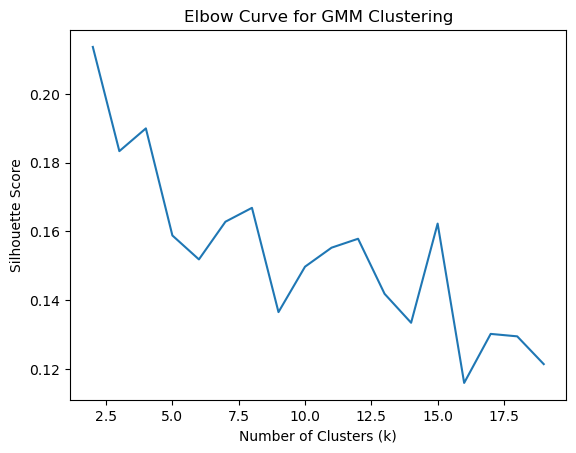

In [226]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

k_range = range(2,20)
silhouette_scores = []

for i in range(2,20):

    # Define the GMM model (experiment with different n_components)
    gmm = GaussianMixture(n_components=i, random_state = 30)  # Adjust the number of components (clusters)

    # Train the GMM model on your data
    gmm.fit(principalDf)

    # Get cluster labels for each data point
    labels = gmm.predict(principalDf)

    # Silhouette score
    silhouette = silhouette_score(principalDf, labels)
    silhouette_scores.append(silhouette)

    # Print results
    #print("Silhouette score:", silhouette)
    #print("Cluster labels:", labels)

# Plot the elbow curve
plt.plot(k_range, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Elbow Curve for GMM Clustering")
plt.show()  # Display the elbow curve

In [227]:
len(labels)

5975

### K Means

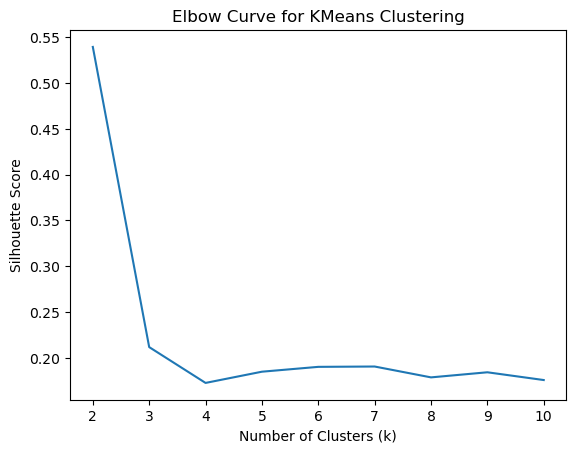

Silhouette scores: [0.5393800895036289, 0.21179884469897842, 0.17269782795941005, 0.18494498414390756, 0.19023235336603472, 0.1906008404874265, 0.1787470109817434, 0.18430752600582628, 0.17584043239454852]
Elbow point (estimated number of clusters): 3
Silhouette score (final): 0.21179884469897842
Cluster labels: [1 1 1 ... 1 2 1]


In [228]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X =  principalDf 

# Function to calculate silhouette score for different k values
def kmeans_silhouette(X, range_k):
  silhouette_scores = []
  for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.predict(X)  # Get cluster labels for each data point
    silhouette_score_ = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_score_)
  return silhouette_scores

# Calculate silhouette scores for a range of k values
k_range = range(2, 11)  # Experiment with a wider range if needed
silhouette_scores = kmeans_silhouette(X, k_range)

# Plot the elbow curve
plt.plot(k_range, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Elbow Curve for KMeans Clustering")
plt.show()  # Display the elbow curve

# Find the elbow point (index of the maximum negative slope)
max_slope_change = float('-inf')
elbow_point = None
for i in range(1, len(silhouette_scores)):
  slope_change = silhouette_scores[i-1] - silhouette_scores[i]
  if slope_change > max_slope_change:
    max_slope_change = slope_change
    elbow_point = k_range[i]

# Print results
print("Silhouette scores:", silhouette_scores)
print("Elbow point (estimated number of clusters):", elbow_point)

# K-Means with the elbow point as the number of clusters
kmeans = KMeans(n_clusters=elbow_point, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

# Silhouette score for the chosen k
silhouette_score_final = silhouette_score(X, labels)
print("Silhouette score (final):", silhouette_score_final)
print("Cluster labels:", labels)

In [229]:
X

,Principle Component 1,Principle Component 2,Principle Component 3,Principle Component 4,Principle Component 5,Principle Component 6,Principle Component 7,Principle Component 8,Principle Component 9,Principle Component 10,Principle Component 11,Principle Component 12
0,-0.990623,-2.052142,-0.313093,3.604950,-0.021796,0.487171,-1.596798,-2.232368,0.281575,-0.338199,1.372111,-0.327995
1,0.907092,0.584589,-3.276333,-0.665122,2.704030,-1.215312,0.413950,-0.700564,1.639439,-0.221538,0.012330,-0.190330
2,2.135059,0.250776,-0.735830,0.051185,1.768015,-2.592757,-3.562030,-1.981792,0.343017,-1.386352,1.088650,0.337145
3,2.279285,0.778702,-2.767810,1.080447,1.437253,-0.695700,-1.217702,0.291161,1.008071,-0.723141,0.675126,-0.459496
4,-0.168512,0.557680,-2.879667,1.085853,2.501453,-0.845435,-0.600228,-0.217257,1.348164,-1.288313,-0.681130,-0.551292
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,-3.712785,-0.481897,0.169952,-0.373865,-2.015461,0.251966,0.344107,1.296558,0.470638,-0.317726,0.237674,0.175425
5971,3.169527,3.185319,-0.469415,-0.664619,-0.706393,-1.123569,-0.771501,-0.822793,-0.727151,1.184000,0.021957,-0.684373
5972,3.614553,3.114972,0.051392,-1.242308,0.705195,-0.955178,-1.510570,1.088581,0.577100,-1.305980,-0.630042,0.327006
5973,-1.852310,2.956579,1.111470,3.151732,1.827820,-1.051499,-0.330261,1.466994,0.171129,0.145993,-1.122692,-1.190317


### Final best model

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X =  principalDf 

# K-Means with the elbow point as the number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

# Silhouette score for the chosen k
silhouette_score_final = silhouette_score(X, labels)
print("Silhouette score (final):", silhouette_score_final)
print("Cluster labels:", labels)

Silhouette score (final): 0.18494498414390756
Cluster labels: [4 1 3 ... 3 4 3]


The best silhoutte score is obtained through K means using 5 clusters.

In [231]:
X['Cluster'] = labels

In [232]:
cluster_counts = X['Cluster'].value_counts()
print(cluster_counts)

1    2108
3    1927
2    1337
4     578
0      25
Name: Cluster, dtype: int64


In [233]:
X['Churn Value'] = y

In [234]:
# Calculate the mean churn rate for each cluster
churn_rate_by_cluster = X.groupby('Cluster')['Churn Value'].mean()

# Print the churn rates to confirm they are as expected
print(churn_rate_by_cluster)


Cluster
0    0.280000
1    0.439753
2    0.084518
3    0.291126
4    0.269896
Name: Churn Value, dtype: float64


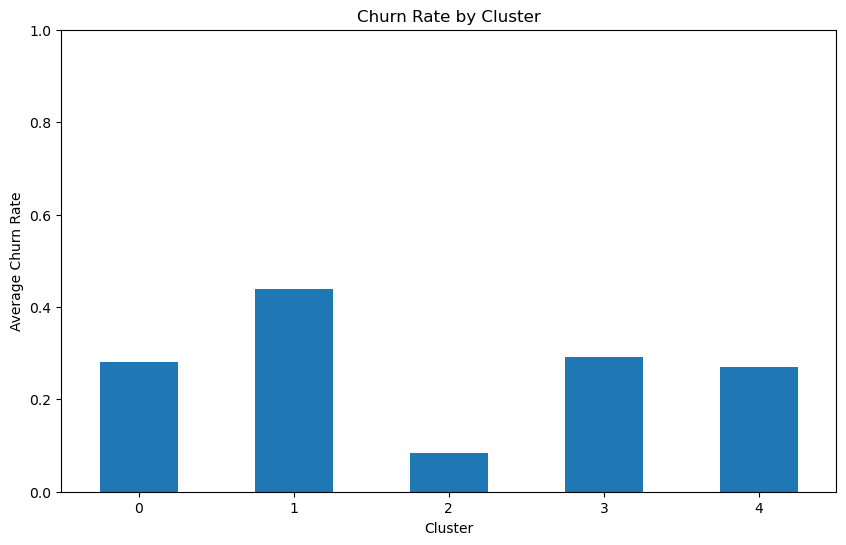

In [238]:
# Plot the churn rate by cluster if the values from the previous step are as expected
churn_rate_by_cluster.plot(kind='bar', figsize=(10, 6))
plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Churn Rate')
plt.ylim(0, 1)  # Ensure y-axis starts at 0 and ends at 1 as churn rate is a percentage
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for clarity
plt.show()

## Survival Model - 4

### Survival Analysis on the Clusters obtained 

In [239]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [240]:
X['Tenure in Months'] = z

In [241]:
z.isna().sum()

0

In [242]:
len(X)

5975

In [243]:
X.to_clipboard()

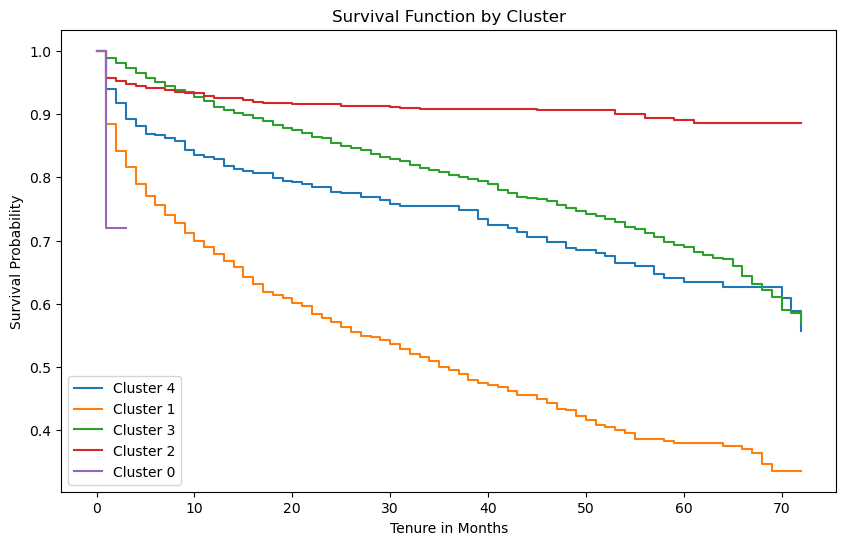

In [244]:
from lifelines import KaplanMeierFitter, CoxPHFitter 
import matplotlib.pyplot as plt

# Convert 'Tenure in Months' to a numeric type if it's not already
#df['Tenure in Months'] = pd.to_numeric(df['Tenure in Months'], errors='coerce')

# Assuming 'Churn Value' is already binary (1 for churned, 0 for not churned)
# Create the Kaplan-Meier objects
kmf = KaplanMeierFitter()

# Plot survival function for each cluster
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as necessary

for cluster in X['Cluster'].unique():
    # Selecting the data for the cluster
    cluster_data = X[X['Cluster'] == cluster]

    # Fit the Kaplan-Meier estimator to the data
    kmf.fit(durations=cluster_data['Tenure in Months'], event_observed=cluster_data['Churn Value'], label='Cluster ' + str(cluster))

    # Plot the survival function for the cluster
    kmf.plot_survival_function(ci_show=False)  # Omit confidence intervals for a cleaner plot

plt.title('Survival Function by Cluster')
plt.xlabel('Tenure in Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [245]:
from lifelines import statistics  # Assuming an older lifelines version

# ... your existing code fitting the KM curves ...

# Separate event times and event indicators for all data points
event_times = X['Tenure in Months'].tolist()  # Convert to list if necessary
events = X['Churn Value'].tolist()

# Unpack the cluster-wise data into separate lists
flattened_times = []
flattened_events = []
for cluster_data in survival_data:
  flattened_times.extend(cluster_data[0])
  flattened_events.extend(cluster_data[1])

# Perform Log-rank test
results = statistics.logrank_test(flattened_times, flattened_events)

# Print the results (might include test statistic and p-value)
print(results)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
       11479.20 <0.005       inf


The test statictic of 11479 and p value of < 0.005 show that there is a strong evidence against the null hypothesis. In the case of a log rank test, the null hypothesis is that there is not significant difference between the churn rates of different clusters. Rejecting the null hupothesis means that our observation that cluster 2 has the least churn is true and not a mere chance.

### Creating a column for tenure flag

In [246]:
X

,Principle Component 1,Principle Component 2,Principle Component 3,Principle Component 4,Principle Component 5,Principle Component 6,Principle Component 7,Principle Component 8,Principle Component 9,Principle Component 10,Principle Component 11,Principle Component 12,Cluster,Churn Value,Tenure in Months
0,-0.990623,-2.052142,-0.313093,3.604950,-0.021796,0.487171,-1.596798,-2.232368,0.281575,-0.338199,1.372111,-0.327995,4,1,1
1,0.907092,0.584589,-3.276333,-0.665122,2.704030,-1.215312,0.413950,-0.700564,1.639439,-0.221538,0.012330,-0.190330,1,1,8
2,2.135059,0.250776,-0.735830,0.051185,1.768015,-2.592757,-3.562030,-1.981792,0.343017,-1.386352,1.088650,0.337145,3,1,18
3,2.279285,0.778702,-2.767810,1.080447,1.437253,-0.695700,-1.217702,0.291161,1.008071,-0.723141,0.675126,-0.459496,3,1,25
4,-0.168512,0.557680,-2.879667,1.085853,2.501453,-0.845435,-0.600228,-0.217257,1.348164,-1.288313,-0.681130,-0.551292,1,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,-3.712785,-0.481897,0.169952,-0.373865,-2.015461,0.251966,0.344107,1.296558,0.470638,-0.317726,0.237674,0.175425,2,0,72
5971,3.169527,3.185319,-0.469415,-0.664619,-0.706393,-1.123569,-0.771501,-0.822793,-0.727151,1.184000,0.021957,-0.684373,3,0,24
5972,3.614553,3.114972,0.051392,-1.242308,0.705195,-0.955178,-1.510570,1.088581,0.577100,-1.305980,-0.630042,0.327006,3,0,72
5973,-1.852310,2.956579,1.111470,3.151732,1.827820,-1.051499,-0.330261,1.466994,0.171129,0.145993,-1.122692,-1.190317,4,0,11


In [247]:
X['Tenure in Months'].median()

26.0

In [248]:
X['Tenure Flag'] = np.where(X['Tenure in Months']<20,'non tenured','tenured')

In [258]:
df_pivot = X[['Cluster','Tenure Flag']]

In [265]:
# Create the pivot table
pivot_table = df_pivot.pivot_table(values='Tenure Flag', index='Cluster', columns='Tenure Flag', aggfunc='size')

# Print the pivot table
print(pivot_table)

Tenure Flag  non tenured  tenured
Cluster                          
0                   25.0      NaN
1                 1296.0    812.0
2                  599.0    738.0
3                  382.0   1545.0
4                  247.0    331.0


The objective was to find the non tenured customers who fall in the same bucket as tenured customers. Cluster 3 acheives this where there are the highest number of tenured customers. This means the non tenured customers on the cluster also tend to stay long with the company. But due to some reason they tend to churn out evident from the churn rate of the cluster which needs to be further investigated. Cluster 2 has the least churn rate and a decent tenured - nontenured split, which also makes the customers in this cluster unlikely to churn out and highly valueable.